In [1]:
import nltk

In [2]:
#nltk.download_shell()
#to download packages
#download stopwords

In [3]:
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
#stripped the file to read the messages

In [4]:
print(len(messages))

5574


In [5]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [6]:
#to print first 10 messages
for mess_no,message in enumerate (messages[:10]):
    print(mess_no,message)
    print('\n')
#to understand how the words are present in the file

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
#tab seperated value(tsv) due to space between

In [8]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
import pandas as pd

In [10]:
messages=pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [11]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [14]:
messages['length']=messages['message'].apply(len)
messages.head()
#length of the messages

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

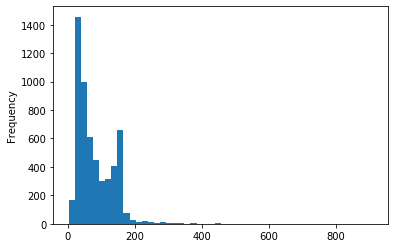

In [16]:
messages['length'].plot.hist(bins=50)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==910]['message'].iloc[0]
#iloc[0]-- to print the actual string

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a0fb94850>,
      dtype=object)

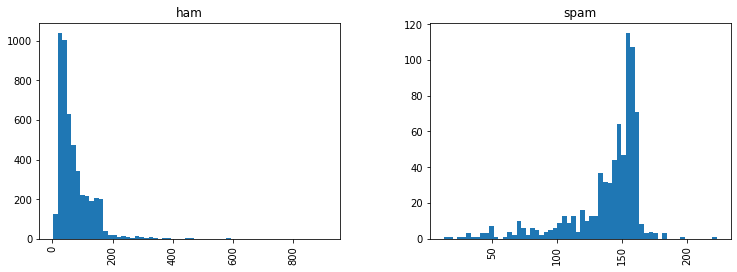

In [19]:
messages.hist(column='length',by='label',bins=60, figsize=(12,4))
#ham message--the central part is around 0-50 words and spam central part is around 150 words

In [20]:
#corpus of string to a vector format-bag of words(seq of numbers)
import string

In [21]:
#remove punctuation
mess='Sample message ! notice:it is a punct,'

In [22]:
nopunc=[c for c in mess if c not in string.punctuation]

In [23]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 ' ',
 'n',
 'o',
 't',
 'i',
 'c',
 'e',
 'i',
 't',
 ' ',
 'i',
 's',
 ' ',
 'a',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't']

In [24]:
#remove stopwords- common words like are, the , is etc.
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
nopunc=''.join(nopunc)

In [27]:
nopunc

'Sample message  noticeit is a punct'

In [28]:
x=['a','b','c','d']
x

['a', 'b', 'c', 'd']

In [29]:
'++'.join(x)

'a++b++c++d'

In [30]:
nopunc.split()

['Sample', 'message', 'noticeit', 'is', 'a', 'punct']

In [31]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess

['Sample', 'message', 'noticeit', 'punct']

In [33]:
def text_process(mess):
    """
    1. remove punctuation
    2. remove stopwords
    3. return list of clean text words
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [36]:
#other normalization--stemming(group similiar words to one)-refernce dictionary is required

In [37]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
print(len(bow_transformer.vocabulary_))
#returns the no of words in our vocab

11425


In [40]:
mess4=messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [41]:
bow4=bow_transformer.transform([mess4])

In [42]:
print(bow4)
#there are 7 unique words out of whic first and last index appeared twice

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [43]:
print(bow4.shape)

(1, 11425)


In [44]:
bow_transformer.get_feature_names()[4068]

'U'

In [45]:
bow_transformer.get_feature_names()[9554]

'say'

In [47]:
message_bow=bow_transformer.transform(messages['message'])

In [48]:
print("shape of sparse matrix:",message_bow.shape)

shape of sparse matrix: (5572, 11425)


In [49]:
message_bow.nnz
#non zero occurences

50548

In [55]:
sparsity=(100*message_bow.nnz/(message_bow.shape[0]*message_bow.shape[1]))
print('Sparsity: {}'.format(sparsity))
#how much zeros are there in matrix--comparing nonzeros with actual values in matrixes

Sparsity: 0.07940295412668218


In [56]:
#weights and normalization--tf and idf transformer
from sklearn.feature_extraction.text import TfidfTransformer

In [57]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [58]:
tfidf4=tfidf_transformer.transform(bow4)

In [59]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [62]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [63]:
messages_tfidf=tfidf_transformer.transform(message_bow)

In [65]:
messages_tfidf.shape

(5572, 11425)

In [66]:
#classification Algo--Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [67]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [68]:
spam_detect_model.predict(tfidf4)[0]
#returns the results

'ham'

In [72]:
#check
messages['label'][3]

'ham'

In [73]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [74]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=0.3)

In [78]:
msg_train

5496    Yes... I trust u to buy new stuff ASAP so I ca...
2887                   No probs hon! How u doinat the mo?
1497    I'm always on yahoo messenger now. Just send t...
4974    Oops I was in the shower when u called. Hey a ...
4922    Its so common hearin How r u? Wat r u doing? H...
                              ...                        
762     We are at grandmas. Oh dear, u still ill? I fe...
3539    We are pleased to inform that your application...
3364                                   Can... I'm free...
5050    Edison has rightly said, "A fool can ask more ...
1237                             How much are we getting?
Name: message, Length: 3900, dtype: object

In [79]:
#data pipeline feature
from sklearn.pipeline import Pipeline

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [91]:
pipeline.fit(msg_train,label_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9a0fb30950>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                              

In [92]:
predictions=pipeline.predict(msg_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       0.99      0.70      0.82       224

    accuracy                           0.96      1672
   macro avg       0.97      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

